In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [3]:
phone_df = pd.read_csv('../data/Smartphone_chosse_preprocessed.csv')
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2000 non-null   int64  
 1   battery_power  2000 non-null   int64  
 2   blue           2000 non-null   int64  
 3   clock_speed    2000 non-null   float64
 4   dual_sim       2000 non-null   int64  
 5   fc             2000 non-null   int64  
 6   four_g         2000 non-null   int64  
 7   int_memory     2000 non-null   int64  
 8   m_dep          2000 non-null   float64
 9   mobile_wt      2000 non-null   int64  
 10  n_cores        2000 non-null   int64  
 11  pc             2000 non-null   int64  
 12  px_height      2000 non-null   int64  
 13  px_width       2000 non-null   int64  
 14  ram            2000 non-null   int64  
 15  sc_h           2000 non-null   int64  
 16  sc_w           2000 non-null   int64  
 17  talk_time      2000 non-null   int64  
 18  three_g 

In [4]:
phone_df = phone_df.dropna()
print(phone_df.shape)

(2000, 22)


In [5]:
phone_df

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794,1,0.5,1,0,1,2,0.8,106,...,1222,1890,668,13,4,19,1,1,0,0
1996,1996,1965,1,2.6,1,0,0,39,0.2,187,...,915,1965,2032,11,10,16,1,1,1,2
1997,1997,1911,0,0.9,1,1,1,36,0.7,108,...,868,1632,3057,9,1,5,1,1,0,3
1998,1998,1512,0,0.9,0,4,1,46,0.1,145,...,336,670,869,18,10,19,1,1,1,0


С помощью seaborn можно построить и распределение dist plot. Для примера посмотрим на распределение Заряда баттареи.

c:\users\ulyag\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='battery_power', ylabel='Density'>

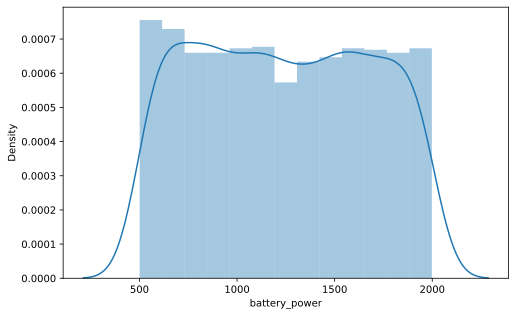

In [16]:
sns.distplot(phone_df.battery_power)

Посмотрим распределение заряда батареи, по ценовым категориям.

<AxesSubplot:xlabel='battery_power', ylabel='price_range'>

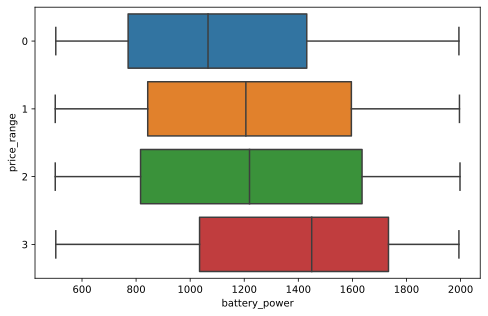

In [18]:
top_cat = phone_df.price_range.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="price_range", x="battery_power", data=phone_df[phone_df.price_range.isin(top_cat)], orient="h")

Heat map позволяет посмотреть на распределение price_range (численного признака) по двум - four_g и three_g.
Визуализируем .

<AxesSubplot:xlabel='four_g', ylabel='three_g'>

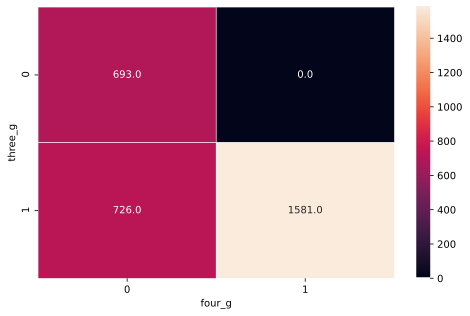

In [19]:
price_three_four = phone_df.pivot_table(
                        index='three_g',
                        columns='four_g',
                        values='price_range',
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(price_three_four, annot=True, fmt=".1f", linewidths=.5)